## 예습과제2

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#생성
dt_clf=DecisionTreeClassifier(random_state=156)

#로딩, 학습-데이터세트 분리
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)
#학습
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=156)

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, feature_names='iris_data.feature_names', impurity=True, filled=True)

ValueError: Length of feature_names, 23 does not match number of features, 4

In [14]:
import graphviz

with open("tree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

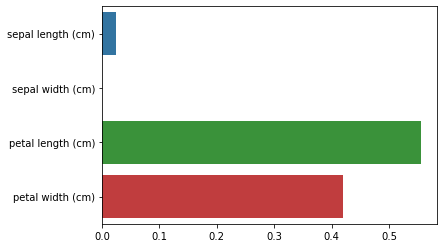

In [13]:
import seaborn as sns
import numpy as np
%matplotlib inline

#추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))
#매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))
    
#시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

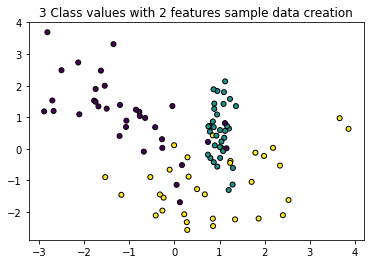

In [17]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 features sample data creation")

X_features,y_labels=make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:,0],X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

NameError: name 'visualize_boundary' is not defined

### 실습

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df=pd.read_csv('features.txt',sep='\s+',header=None, names=['column_index','colunmn_name'])
feature_name=feature_name_df.iloc[:,1].values.tolist()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [22]:
feature_dup_df=feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()


KeyError: 'column_name'

In [29]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df=feature_dup_df.reset_index()
    new_feature_name_df=pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df



In [30]:
import pandas as pd

def get_human_dataset():
    feature_name_df=pd.read_csv('features.txt',sep='\s+',header=None, names=['column_index','column_name'])
    
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    
    feature_name=new_feature_name_df.iloc[:,1].values.tolist()
    X_train=pd.read_csv('X_train.txt',sep='\s+',names=feature_name)
    X_test=pd.read_csv('X_test.txt',sep='\s+',names=feature_name)
    y_train=pd.read_csv('y_train.txt',sep='\s+',header=None, names=['action'])
    y_test=pd.read_csv('y_test.txt',sep='\s+',header=None, names=['action'])
    
    return X_train, X_test, y_train,y_test

X_train,X_test, y_train,y_test=get_human_dataset()

In [31]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print(accuracy)
print(dt_clf.get_params())


0.8547675602307431
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [33]:
from sklearn.model_selection import GridSearchCV

params={'max_depth':[6,8,10,12,16,20,24]}
grid_cv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)



Fitting 5 folds for each of 7 candidates, totalling 35 fits
0.8513444970102249
{'max_depth': 16}


In [34]:
cv_results_df=pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [35]:
max_depths=[6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test,pred)
    print(depth, accuracy)

6 0.8557855446216491
8 0.8707159823549372
10 0.8673227010519172
12 0.8646080760095012
16 0.8574821852731591
20 0.8547675602307431
24 0.8547675602307431


In [37]:
params={
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24],
}
grid_cv=GridSearchCV(dt_clf,param_grid=params, scoring='accuracy',cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.8548794147162603
{'max_depth': 8, 'min_samples_split': 16}


In [38]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred1)
print(accuracy)

0.8717339667458432


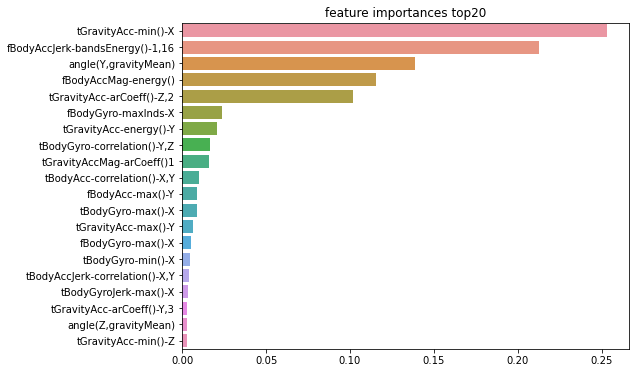

In [39]:
import seaborn as sns
ftr_importances_values=best_df_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('feature importances top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 3앙상블학습

In [40]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [42]:
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('knn',knn_clf)],voting='soft')

X_train, X_test, y_train, y_test=train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred=vo_clf.predict(X_test)
print('voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0}정확도:{1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

voting 분류기 정확도: 0.9474
LogisticRegression정확도:0.9386
KNeighborsClassifier정확도:0.9386


### 4랜덤포레스트

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train,y_test=get_human_dataset()

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy))


랜덤 포레스트 정확도: 0.9253


In [49]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9180


In [51]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print("예측정확도:{0:.4f}".format(accuracy_score(y_test,pred)))

예측정확도:0.9165


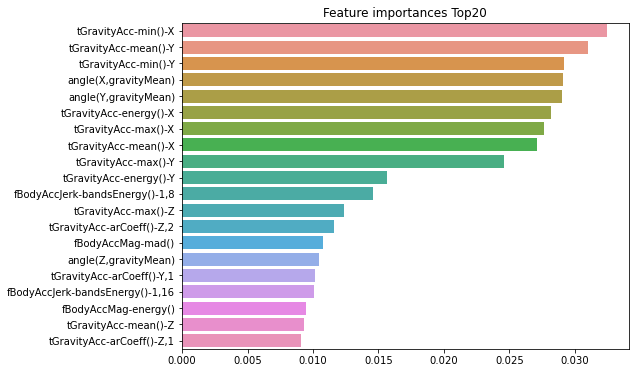

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()